In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 30
print(cv2.__version__)

3.3.0


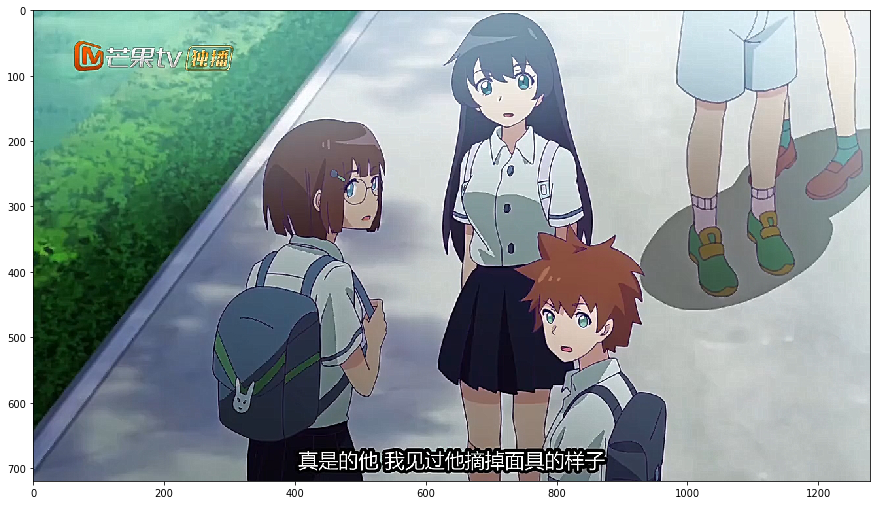

In [2]:
ori_image = cv2.imread("../images/testsubtitle_6.jpg")
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # cv2 use bgr but plt use rgb
plt.imshow(ori_image)
plt.show()

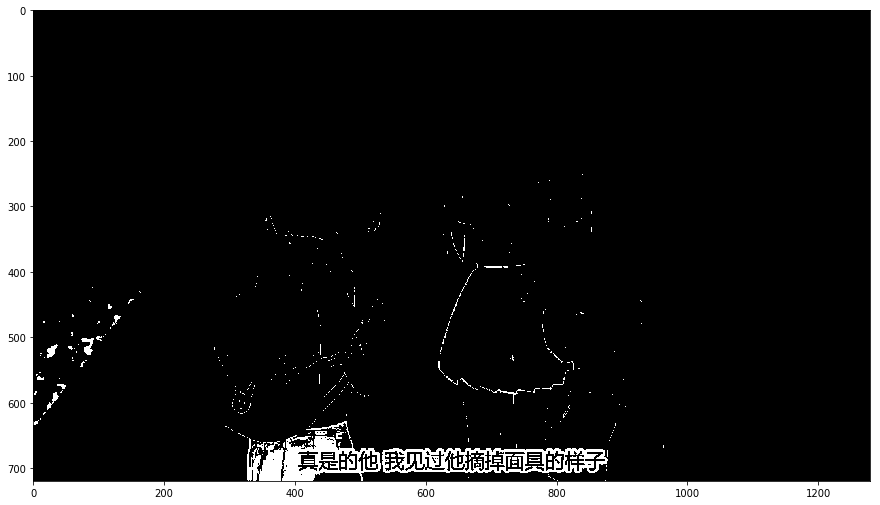

In [3]:
black_mask = cv2.inRange(ori_image, (0,0,0), (20,20,20))
plt.imshow(black_mask,cmap = plt.cm.gray)
plt.show()

In [4]:
def get_cavity(mask):
    cnt = 0
    helper_image = mask.copy()
    height,width = mask.shape
    result_image = np.zeros([height,width],dtype=np.uint8)
    for i in np.arange(height):
        for j in np.arange(width):
            if helper_image[i][j] == 0:
                maker = []
                queue = [(i,j)]
                max_row = min_row = i
                max_col = min_col = j
                while len(queue) > 0:
                    row,col = queue.pop()
                    maker.append((row,col))
                    if max_row < row:
                        max_row = row
                    if min_row > row:
                        min_row = row
                    if max_col < col:
                        max_col = col
                    if min_col > col:
                        min_col = col
                    for a in np.arange(-1,2):
                        for b in np.arange(-1,2):
                            if row+a >= 0 and row+a < height and col+b >=0 and col+b < width and helper_image[row+a][col+b] == 0:
                                helper_image[row+a][col+b] = 255
                                queue.append((row+a,col+b))               
                                cnt = cnt+1
                if min_row > 0 and max_row < height-1 and min_col > 0 and max_col < width-1:
                    for point in maker:
                        row,col = point
                        result_image[row][col] = 255
    return result_image
                        

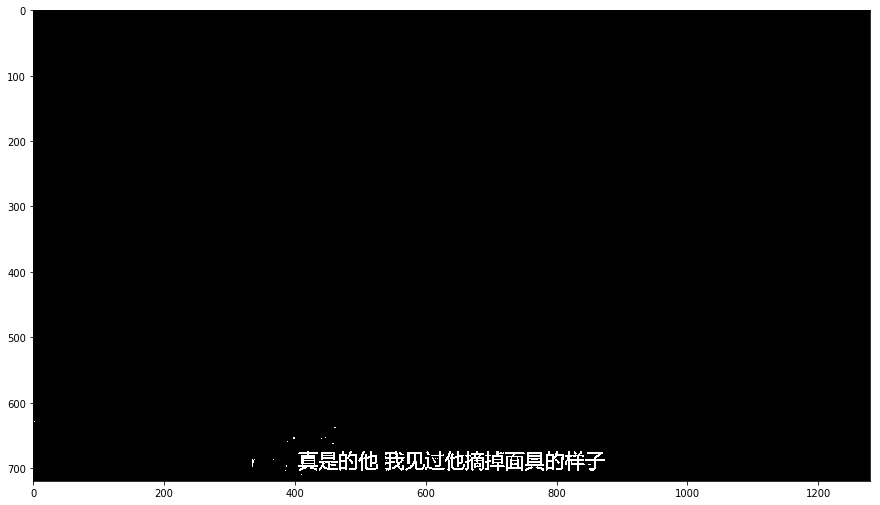

In [5]:
cavity_mask = get_cavity(black_mask)
plt.imshow(cavity_mask,cmap = plt.cm.gray)
plt.show()

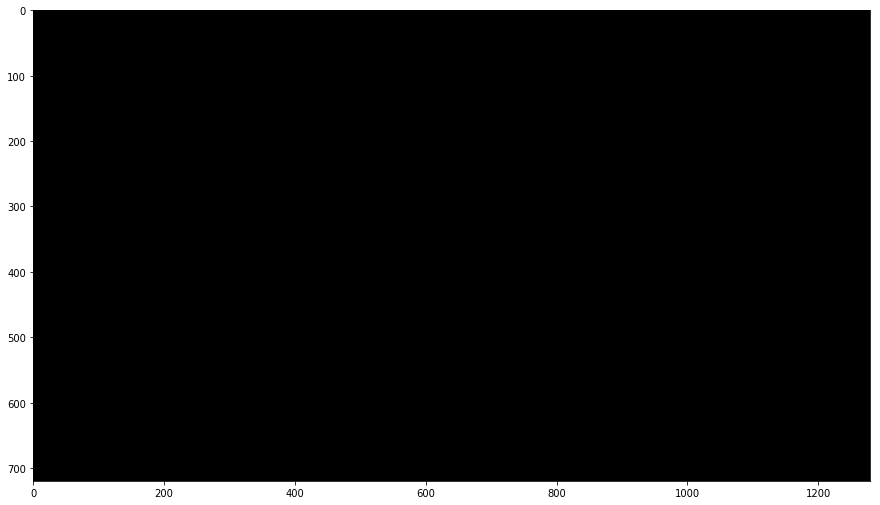

In [6]:
opening_mask = cv2.morphologyEx(cavity_mask, cv2.MORPH_OPEN, np.ones((7,7)))
plt.imshow(opening_mask,cmap = plt.cm.gray)
plt.show()

In [7]:
def clear_big_element(cavity_mask,opening_mask):
    result_image = cavity_mask.copy()
    helper_image = opening_mask.copy()
    height,width = cavity_mask.shape
    mask_flood = np.zeros((height+2, width+2), np.uint8)
    for i in np.arange(height):
        for j in np.arange(width):
            if result_image[i][j] == 255 and helper_image[i][j] == 255:
                cv2.floodFill(result_image,mask_flood,(j,i),0)
                cv2.floodFill(helper_image,mask_flood,(j,i),0)
    return result_image

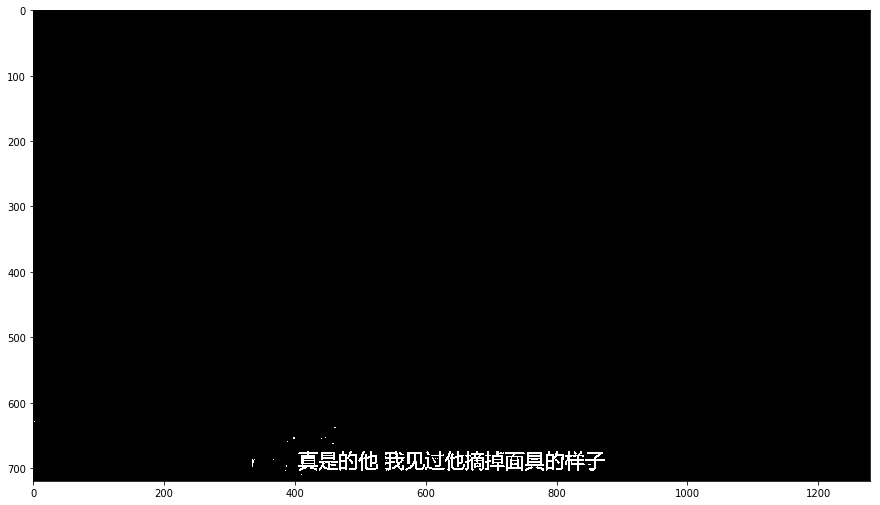

In [9]:
result = clear_big_element(cavity_mask,opening_mask)
plt.imshow(result,cmap = plt.cm.gray)
plt.show()

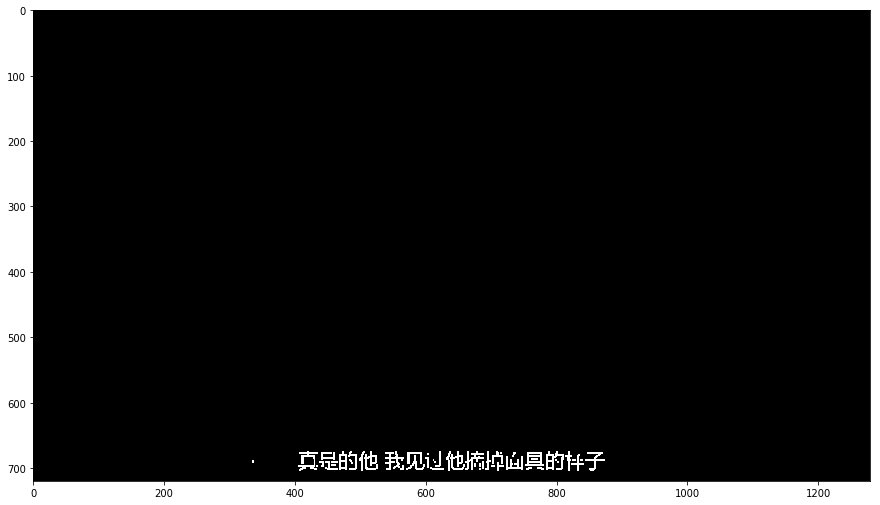

In [10]:
clearLittleNoisyObject = cv2.morphologyEx(result, cv2.MORPH_OPEN, np.ones((3,3)))
plt.imshow(clearLittleNoisyObject,cmap = plt.cm.gray)
plt.show()